In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston

X,y = load_boston(return_X_y=True)
# X has the first 13 features.
# y is the corresponding median housing value.

# We'll use ML to predict y. 

(506, 13)
(506,)


In [27]:
# Let's create a DataFrame with all variables.
features_without_val = load_boston()['feature_names']
features = np.concatenate((features_without_val,['MEDV']))
import pandas as pd
data = np.array([np.concatenate((X[i],[y[i]])) for i in range(len(X))])
data = pd.DataFrame(data,columns = features)

In [28]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [35]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
# In order to better understand this dataset, let's plot some things. But first, to avoid data snooping bias, 
# let's set aside training and testing subsets.

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

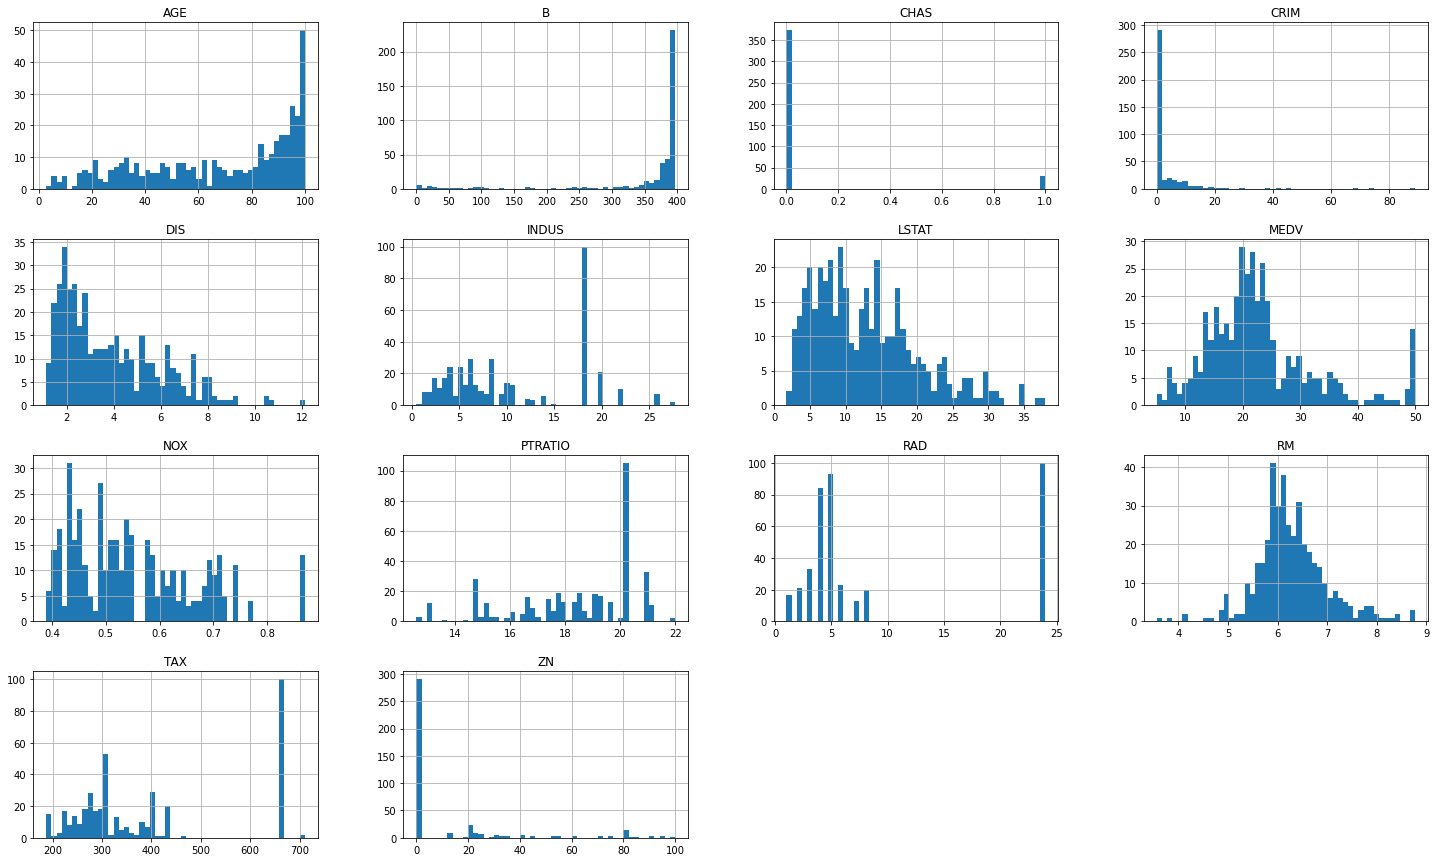

In [34]:
# Ok, now let's plot some stuff!

data_train = pd.DataFrame(np.array([np.concatenate((X_train[i],[y_train[i]])) for i in range(len(X_train))]),
                         columns = features)

data_train.hist(bins=50,figsize=(25,15))
plt.show()

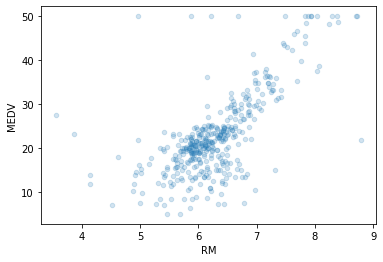

In [38]:
# What we see is that RM (rooms per household) and MEDV (median home value) are approximately normally distributed.
# And they seem to be correlated! (Which is not that big of a surprise, but still...)
# It doesn't seem to make a lot of sense to stratify our dataset, so we'll stick with X_train for now.

data_train.plot(kind='scatter',x='RM',y='MEDV',alpha=0.2)
plt.show()

# This shows a sort of linear relation between RM and MEDV, so we can allow ourselves to use a linear model.
# Which one? 

In [80]:
# First try: a simple linear regression. 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [81]:
# Let's see how this model fares in the training dataset.

from sklearn.metrics import mean_squared_error

y_train_pred = lin_reg.predict(X_train)
print('Mean squared error for linear regression:',mean_squared_error(y_train_pred,y_train))

Mean squared error for linear regression: 22.835996122134425


In [47]:
# Let's see if using stochastic gradient descent we fare better:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=100,penalty=None,eta0=0.01)
sgd_reg.fit(X_train,y_train)
y_train_pred_sgd = sgd_reg.predict(X_train)
print('Mean squared error for SGDRegressor:',mean_squared_error(y_train_pred_sgd,y_train))

Mean squared error for SGDRegressor: 4.660425737548832e+28


In [54]:
# Yikes... throw that model out the window, is what I tell you. Let's try another model. 
# A regularized model, for once.

# In that case, we need to scale our data.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
ridge_reg = Pipeline([('scaler',StandardScaler()),
          ('linear_model',Ridge(alpha=1,solver='cholesky'))])
ridge_reg.fit(X_train,y_train)
y_train_pred_ridge = ridge_reg.predict(X_train)
print('Mean squared error for Ridge:',mean_squared_error(y_train_pred_ridge,y_train))

Mean squared error for Ridge: 22.838069170661925


In [51]:
# Notice how this is really close to the MSE for the 

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_model', Ridge(alpha=1, solver='cholesky'))])

In [68]:
# The third model we'll experiment with is a SVM.

from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

parameters = {'epsilon':[0.35,0.4, 0.45],
             'max_iter':[48000,49000,50000,51000,52000]}
svr_reg = LinearSVR()
gridsearch = GridSearchCV(svr_reg, parameters, cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)
gridsearch.fit(X_train,y_train)

/home/joaoruiz/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/joaoruiz/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/joaoruiz/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/joaoruiz/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/joaoruiz/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear fai

/home/joaoruiz/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/joaoruiz/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/joaoruiz/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/joaoruiz/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/joaoruiz/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear fai

/home/joaoruiz/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/joaoruiz/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=5, estimator=LinearSVR(),
             param_grid={'epsilon': [0.35, 0.4, 0.45],
                         'max_iter': [48000, 49000, 50000, 51000, 52000]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [69]:
gridsearch.best_params_

{'epsilon': 0.4, 'max_iter': 48000}

In [71]:
# So let's set epsilon to zero then. 
svr_reg = LinearSVR(epsilon=0.4,max_iter=50000)
svr_reg.fit(X_train,y_train)
y_train_pred_svr = svr_reg.predict(X_train)
print('MSE for the LinearSVR:',mean_squared_error(y_train_pred_svr,y_train))

MSE for the LinearSVR: 28.25154735820098


/home/joaoruiz/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [83]:
# Apparently, our best bet is the simple linear regression. Let's see how this model fares in the test set.

y_pred = lin_reg.predict(X_test)
print('MSE for the linear regression on the test set:',mean_squared_error(y_pred,y_test))

MSE for the linear regression on the test set: 19.29923143471206
